### <font color="Red" size="6"> Juan Esteban Moreno Agudelo</font>

#### *Una de las estrategias que el granjero Ted esta considerando es minimizar sus pérdidas medias. Considere una pérdida cuando las ganancias caen cierta cantidad $\mu_{min}$*. *Construya y resuelva el problema del granjero Ted usando los datos de la lectura 6 para diferentes valores de $\mu_{min}$ seleccionados segun su aversión al riesgo.*

#### *pista $\,\Rightarrow$ Puede usar el concepto de minimización del deficit.*
#### *La función objetivo debe verse como $\mathbb{E}\big[(\mu_{min}-U(x, y(\omega), z(\omega)))^{+}\big]$ donde $x$ representa las decisiones de primera etapa, $y(\omega)$ representa las compras de maíz y trigo y $z(\omega)$ representa las ventas de maíz, trigo y arracacha como función de los rendimientos inciertos $\omega$.*


### *información del problema:*
```markdown
                           | Wheat | Corn |        Beets         |
|--------------------------|-------|------|----------------------|
| Yield(T/acre)            |  2.5  |  3   |         20           |
|--------------------------|-------|------|----------------------|
| Planting cost($/acre)    |  150  | 230  |         260          |
|--------------------------|-------|------|----------------------|
|                          |       |      |                      |
|  Selling price($/Ton)    |  170  | 150  | 36 si oferta <= 6000T|
|                          |       |      | 10 si oferta > 6000T |
|--------------------------|-------|------|----------------------|
| Purchase price($/Ton)    |  238  | 210  |        N.A           |
|--------------------------|-------|------|----------------------|
| Minimum requirement(Tons)|  200  | 240  |        N.A           |
|--------------------------|-------|------|----------------------|
```

#### *Debido a condiciones climáticas los rendimientos de los cultivos son inciertos*

```markdown
   scenario | wheat yield | corn yield  | beet yield |
|-----------|-------------|-------------|------------|
|    good   |      3      |    3.6      |     24     |
|-----------|-------------|-------------|------------|
|    fair   |     2.5     |     3       |     20     |
|-----------|-------------|-------------|------------|
|    bad    |      2      |     2.4     |     16     |
|-----------|-------------|-------------|------------|
```

#***Modelado***


### ```Conjuntos```
##### $S_{i}:$ Conjunto de semillas
##### $E_{j}:$ Conjunto de escenarios

### ```Parámetros```
##### $C_{i}:$ Costo de plantar el producto $i$ en $\frac{$}{acre}$
##### $V_{i}:$ Precio de venta del producto $i$ en $\frac{$}{Ton}$
##### $V^{min}_{arrac}:$ Precio de venta primeras 6000Ton en $\frac{$}{Ton}$
##### $V^{max}_{arrac}:$ Precio de venta posteriores 6000Ton en $\frac{$}{Ton}$
##### $P_{i}:$ Precio de compra del producto $i$ en $\frac{$}{Ton}$
##### $R_{i}:$ Mínimo requerido del producto $i$ en Tons
##### $\omega_{ij}:$ Materialización del producto $i$ en el escenario $j$
##### $D_{crop}:$ Tierra disponible para sembrar
##### $p^{prob}_{j}:$ Probabilidad del escenario $j$.
##### $M^{prod}_{i}:$ Máxima cota del producto $i$


### ```Variables de decisión ``` 
#### $x_{i}:$ Acres plantados del producto $i$ en la primera etapa.
#### $y_{ij}:$ Toneladas compradas del producto $i$ en el escenario $j$.
#### $z_{ij}:$ Toneladas vendidas del producto $i$ en el escenario $j$.

#### *Las arracachas tiene un tope de toneladas de 6000 a partir del cual ya no es rentable producir.*






#### *La función de pérdida es $\rightarrow \,\, \mathbb{L} = (\mu_{min} - U^{prof})$*
#### *Las ganacias son función de las decisiones de primera etapa, de las compras según el escenario materializado e igualmente para las ventas:*
$$U^{prof}(x, y(\omega), z(\omega)) = \sum_{i \in I}\Big(V^{sup}_{i}z_{ij} + V^{inf}_{i}z_{ij} - \big(C_{i}x_{i} + P_{i}y_{ij}\big)\Big)   
\,\, \forall j \in E$$

#### *Hay unos límites de venta según la cantidad de toneladas para la arracacha, así que en realidad esos precios de venta $V^{sup}_{i}$ y $V^{inf}_{i}$ cumplen en este caso para las arracachas.*

#### *Se organiza la expresión de las ganancias(profits)*
#### *$$U = \sum_{j \in E}\sum_{i \in I}\big[V^{sup}_{i}z_{ij} + V^{inf}_{ij}z_{ij} -\big(C_{i}x_{i} + P_{i}y_{ij}\big)\big]$$*

#### *$$U = \sum_{j \in E}\sum_{i \in I}\big[V^{sup}_{i}z_{ij} + V^{inf}_{ij}z_{ij} - P_{i}y_{ij}\big] - \sum_{i \in I}C_{i}x_{i}$$*


#### *$$U = - \Bigg[\sum_{j \in E}\sum_{i \in I}\big[P_{i}y_{ij} - V^{sup}_{i}z_{ij} - V^{inf}_{ij}z_{ij}\big] + \sum_{i \in I}C_{i}x_{i}\Bigg]$$*

#### *Como se va calcular un valor esperado, organizamos la expresion para encontrar ese valor, dadas unas probabilidades por escenario.*
#### *Las constantes y variables que no dependan de los escenarios se sacan de las sumatorias en las que no tiene índice asociado, como los son las variables anticipativas de cuanto sembrar.*

#### *$$U = - \Bigg[\sum_{j \in E}\sum_{i \in I}P^{prob}_{j}\big[P_{i}y_{ij} - V^{sup}_{i}z_{ij} - V^{inf}_{ij}z_{ij}\big] + \sum_{i \in I}C_{i}x_{i}\Bigg]$$*

#### *La expresión total es considerando el valor esperado:*

$$\mathbb{E}[max(\mu_{min} - U, \,0)] \approx \sum_{j \in E}P^{prob}_{j}\big[max(\mu_{min} - U, \, 0)\big]$$

#### *Sea entonces* 
$$ \mathbb{L} = max(\mu_{min} - U, \, 0) \rightarrow \mathbb{E}[max(\mu_{min} - U, \,0)] = \sum_{j \in E}P^{prob}_{j}\mathbb{L}_{j}$$

#### *La variable a minimizar será esa función de pérdida, para poder lidiar con ese max utilizamos el concepto del epigrafo.*

$$min\,\,\, \sum_{j \in E}P^{prob}_{j}\mathbb{L}_{j}$$

## **Restricciones del problema:**
#### *1). Límite de acres disponibles*

#### *$$\sum_{i \in I}x_{i} \leq D_{crop}$$*

#### *2). Restricción de suministros mínimos para los animales, diferencia entre lo que se compra y lo que se vende.*

#### *$$\omega_{ij}x_{i}  y_{ij} - (z^{sup}_{ij} + z^{inf}_{ij}) \geq R_{i}\,\,\,\,\,\,  \forall i \in I, \, \forall j \in E$$*

#### *3). Restricción de venta según cierta cantidad a la cual sea rentable, la pondré general, pero para este problema sería solo para las arracachas.*
#### *$$z_{ij} \leq M^{prod}_{i}\,\,\,\,\,\, \forall i \in I, \, \forall j \in E$$*

#### *4). Lo que se vende de cada producto no puede ser mayor a lo que se produzca con la materialización de cada escenario.*

#### *$$z^{sup}_{ij} + z^{inf}_{ij} \leq \omega_{ij}x_{i}$$*

#### *5). El dominio de las variables.*

$$x_{i}, \,\,\, y_{ij}, \,\,\, z^{sup}_{ij}, \,\,\, z^{inf}_{ij} \geq 0$$







In [ ]:
!pip install pyomo

     |████████████████████████████████| 9.5MB 7.4MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 256kB 34.0MB/s 
     |████████████████████████████████| 163kB 53.3MB/s 


In [ ]:
# instal cbc
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
import pandas as pd
import pyomo.environ as pyo
from pyomo.util.infeasible import log_infeasible_constraints
from pyomo.opt import SolverStatus,TerminationCondition
import numpy as np
import math

model = pyo.ConcreteModel()
opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')

# sets
model.S = pyo.Set(initialize=["trigo", "maíz", "aracacha"], doc="Semillas")
model.E = pyo.Set(initialize=["good", "fair", "bad"], doc="Escenarios")

#Parametros
_initCost = {
    "trigo": 150,
    "maíz": 230,
    "aracacha":260}
model.C = pyo.Param(model.S, initialize=_initCost, doc="Costo de plantas cada acre")

_initSellPriceLow = {
    "trigo": 170,
    "maíz": 150,
    "aracacha":36}
model.Vlow = pyo.Param(model.S, initialize=_initSellPriceLow, 
    doc="Precio de venta de los productos por debajo del tope")

_initSellPriceUp = {
    "trigo": 0,
    "maíz": 0,
    "aracacha":10}
model.Vup = pyo.Param(model.S, initialize=_initSellPriceUp, 
    doc="Precio de venta de los productos por encima del tope")

_initPurchPrice = {
    "trigo": 238,
    "maíz": 210,
    "aracacha":100000000000}
model.P = pyo.Param(model.S, initialize=_initPurchPrice, 
    doc="Precio de compra")

_initRequir = {
    "trigo": 200,
    "maíz": 240,
    "aracacha":0}
model.R = pyo.Param(model.S, initialize=_initRequir, 
    doc="Requerimientos para bestías")

_initw = {("good", "trigo"): 3, ("good", "maíz"): 3.6, ("good", "aracacha"): 24,
          ("fair", "trigo"): 2.5, ("fair", "maíz"): 3, ("fair", "aracacha"): 20,
          ("bad", "trigo"): 2, ("bad", "maíz"): 2.4, ("bad", "aracacha"): 16
          }
model.w = pyo.Param(model.E, model.S, initialize=_initw, doc="Materialización de escenarios")

model.D = pyo.Param(initialize=500, doc="Tierra disponible")

_initProb = {
    "good":1/3,
    "fair":1/3,
    "bad":1/3}
model.Prob = pyo.Param(model.E, initialize=_initProb, 
    doc="Probabilidades por escenario")

_initCotas = {
    "trigo": 100000000000000,
    "maíz": 10000000000000000,
    "aracacha": 6000}
model.Max = pyo.Param(model.S, initialize=_initCotas, doc="cotas para venta")
model.mu = pyo.Param(default=0, mutable=True, 
    doc="criterio de pérdidas mínimas")

In [ ]:
# Vars
model.x = pyo.Var(model.S, domain=pyo.NonNegativeReals, doc="Acres a plantar")
model.y = pyo.Var(model.S, model.E, domain=pyo.NonNegativeReals, doc="Toneladas a comprar")
model.zup = pyo.Var(model.S, model.E, domain=pyo.NonNegativeReals, doc="Toneladas a vender por encima")
model.zlow = pyo.Var(model.S, model.E, domain=pyo.NonNegativeReals, doc="Toneladas a vender por debajo")
model.L = pyo.Var(model.E, domain=pyo.NonNegativeReals, doc="Función de pérdida")
model.Uprof = pyo.Var(model.E, doc="Ganancias")

In [ ]:
# Función objetivo
# def obj(model):
#     return sum(model.Prob[j]*model.L[j] for j in model.E)
# model.objective = pyo.Objective(rule=obj, sense=pyo.minimize, 
#         doc="Minimizar la función de pérdida")

def obj(model):
    return sum(model.Uprof[j] for j in model.E)
model.objective1 = pyo.Objective(rule=obj, sense=pyo.maximize, 
        doc="Minimizar la función de pérdida")

def constraint1(model, j):
    return model.L[j] >= model.mu - model.Uprof[j]
model.Loss1 = pyo.Constraint(model.E, rule=constraint1)

def constraint9(model, j):
    return model.L[j] >= 0
model.Loss2 = pyo.Constraint(model.E, rule=constraint1)

def constraint2(model, j):
    return model.Uprof[j] == sum(model.Vup[i]*model.zup[i,j] + \
                model.Vlow[i]*model.zlow[i,j] - model.P[i]*model.y[i,j] for i in model.S) - \
               sum(model.C[i]*model.x[i] for i in model.S)
model.profitConstr = pyo.Constraint(model.E, rule=constraint2)

def constraint3(model, i, j):
    return model.w[j, i]*model.x[i] + model.y[i, j] - (model.zup[i,j] + model.zlow[i, j]) >= model.R[i]
model.limits = pyo.Constraint(model.S, model.E, rule=constraint3)

def constraint4(model):
    return sum(model.x[i] for i in model.S) <= model.D
model.limiteAcre = pyo.Constraint(rule=constraint4)

def constraint7(model, i, j):
    return model.zlow[i,j] + model.zup[i,j] <= model.w[j, i]*model.x[i]
model.LimitSell = pyo.Constraint(model.S, model.E, rule=constraint7)

def constraint8(model, i, j):
    return model.zlow[i,j] <= model.Max[i]
model.LimitMin = pyo.Constraint(model.S, model.E, rule=constraint8)


In [ ]:
sum(list(model.Uprof.get_values().values()))

142320.0

In [ ]:
profits = {}
Exp = {}
steps = np.linspace(0.4, 1.5, 50)
for step in steps:
    model.mu = step*118600
    results = opt.solve(model)
    Exp[118600*step] = model.objective.expr()
    profits[step*118600] = sum(list(model.Uprof.get_values().values()))

Text(0.5, 0, 'mínima pérdida [$\\mu$]')

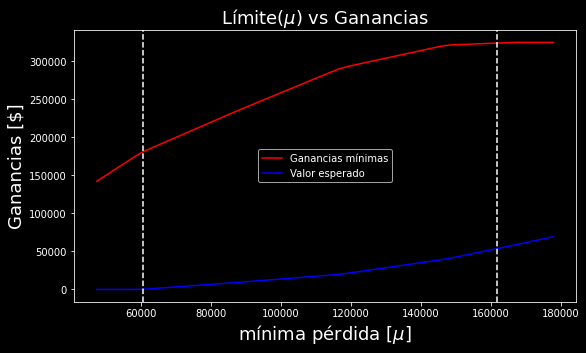

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(9, 5))
plt.plot(list(profits.keys()), list(profits.values()), label="Ganancias mínimas", color="red")
plt.plot(list(profits.keys()), list(Exp.values()), label="Valor esperado", color="blue")
plt.title(r'Límite($\mu$) vs Ganancias', fontsize=18)
plt.axvline(x=60752.244897959186, linestyle="--")
plt.axvline(x=161925.306122449, linestyle="--")
plt.legend()
plt.ylabel("Ganancias [$]", fontsize=18)
plt.xlabel(r"mínima pérdida [$\mu$]", fontsize=18)

#### *Como puede verse, hay valores de $\mu_{min}$ para el cual la función de pérdida es 0 y las ganancias aumentan, sin embargo a partir de $\mu_{min}$ de poco mas de 60.000$, si bien siguen aumentando las ganancias, la función de pérdida comienza a encarecerse, así que en este punto el granjero deberá de tomar la decisión de decir si aguanta ese encarecimiento hasta que se estabiliza en alrededor de 162.000*


#### *A continuación se mostrarán los resultados de las variables no anticipativas y de las anticipativas.*

In [ ]:
model.x.display()

x : Acres a plantar
    Size=3, Index=S
    Key      : Lower : Value : Upper : Fixed : Stale : Domain
    aracacha :     0 : 250.0 :  None : False : False : NonNegativeReals
        maíz :     0 :  80.0 :  None : False : False : NonNegativeReals
       trigo :     0 : 170.0 :  None : False : False : NonNegativeReals


#### *Puede verse que en efecto al ser más masivo para producir y al no requerirlo para alimentar las bestias, el modelo destina una buena cantidades de acres a las aracachas.*

In [ ]:
model.zlow.display()

zlow : Toneladas a vender por debajo
    Size=9, Index=zlow_index
    Key                  : Lower : Value  : Upper : Fixed : Stale : Domain
     ('aracacha', 'bad') :     0 : 4000.0 :  None : False : False : NonNegativeReals
    ('aracacha', 'fair') :     0 : 5000.0 :  None : False : False : NonNegativeReals
    ('aracacha', 'good') :     0 : 6000.0 :  None : False : False : NonNegativeReals
         ('maíz', 'bad') :     0 :    0.0 :  None : False : False : NonNegativeReals
        ('maíz', 'fair') :     0 :    0.0 :  None : False : False : NonNegativeReals
        ('maíz', 'good') :     0 :   48.0 :  None : False : False : NonNegativeReals
        ('trigo', 'bad') :     0 :  140.0 :  None : False : False : NonNegativeReals
       ('trigo', 'fair') :     0 :  225.0 :  None : False : False : NonNegativeReals
       ('trigo', 'good') :     0 :  310.0 :  None : False : False : NonNegativeReals


#### *Aquí se aprecian los resultados de lo que se debe comprar, variable (anticipativa) y vemos que por ejemplo solo se vende maíz en escenario "Bueno", mientras que el trigo que se paga más costoso, el modelo intenta maximizar su producción para poder venderlo incluso en el escenario "malo".*

In [ ]:
model.zup.display()

zup : Toneladas a vender por encima
    Size=9, Index=zup_index
    Key                  : Lower : Value : Upper : Fixed : Stale : Domain
     ('aracacha', 'bad') :     0 :   0.0 :  None : False : False : NonNegativeReals
    ('aracacha', 'fair') :     0 :   0.0 :  None : False : False : NonNegativeReals
    ('aracacha', 'good') :     0 :   0.0 :  None : False : False : NonNegativeReals
         ('maíz', 'bad') :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('maíz', 'fair') :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('maíz', 'good') :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('trigo', 'bad') :     0 :   0.0 :  None : False : False : NonNegativeReals
       ('trigo', 'fair') :     0 :   0.0 :  None : False : False : NonNegativeReals
       ('trigo', 'good') :     0 :   0.0 :  None : False : False : NonNegativeReals


In [ ]:
model.y.display()

y : Toneladas a comprar
    Size=9, Index=y_index
    Key                  : Lower : Value : Upper : Fixed : Stale : Domain
     ('aracacha', 'bad') :     0 :   0.0 :  None : False : False : NonNegativeReals
    ('aracacha', 'fair') :     0 :   0.0 :  None : False : False : NonNegativeReals
    ('aracacha', 'good') :     0 :   0.0 :  None : False : False : NonNegativeReals
         ('maíz', 'bad') :     0 :  48.0 :  None : False : False : NonNegativeReals
        ('maíz', 'fair') :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('maíz', 'good') :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('trigo', 'bad') :     0 :   0.0 :  None : False : False : NonNegativeReals
       ('trigo', 'fair') :     0 :   0.0 :  None : False : False : NonNegativeReals
       ('trigo', 'good') :     0 :   0.0 :  None : False : False : NonNegativeReals


#### *En el caso de las compras, que son encarecimientos de la función objetivo, solo se dan en el escenario de baja producción para el maíz*

### <font color="Red" size="6"> Problema 2</font>

#### *Otra estrategia del granjero para mitigar el riesgo es aceptar una ganancia razonable bajo el peor caso (en la materialización del peor escenario).* *Encuentre la solución que maximize las ganancias esperadas bajo la restricción que en el peor caso las ganancias no caigan por debajo de cierta cantidad $\mu_{min}$.* *Elija distintos valores de $\mu_{min}$ y comente los resultados.*

#### *En este caso se evaluará el peor escenario y que se cumpla según el enunciado:*

$$U^{prof} \geq \mu_{min}$$

In [ ]:
# Añadimos la restricción de este problema
def constraint9(model, j):
    if j != "bad":
        return pyo.Constraint.Skip
    else:
        return  sum((model.Vup[i]*model.zup[i,j] + \
                    model.Vlow[i]*model.zlow[i,j] - model.P[i]*model.y[i,j]) for i in model.S) - \
                sum(model.C[i]*model.x[i] for i in model.S) >= model.mu
model.profitConstrP2 = pyo.Constraint(model.E, rule=constraint9)

# Desactivo estas restricciones del problema 1
model.Loss1.deactivate()
model.Loss2.deactivate()
# model.profitConstr.deactivate()

profitsP2 = {}
ExpP2 = {}
L = {}
steps = np.linspace(0.5, 1.2, 20)
for step in steps:
    model.mu = step*59300
    results = opt.solve(model)

    if (results.solver.status == SolverStatus.ok) and \
        (results.solver.termination_condition == TerminationCondition.optimal):
        print("Solución óptima ")
        # print(str(results.solver)) 
    elif results.solver.termination_condition == TerminationCondition.infeasible:
        print("Algo está mal..")
    else:
        # algo esta mal 
        print(str(results.solver)) 
    log_infeasible_constraints(model)
    ExpP2[59300*step] = model.objective1.expr()/3
    profitsP2[step*59300] = sum(list(model.Uprof.get_values().values()))



Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
Solución óptima 
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
Algo está mal..
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
Algo está mal..
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
Algo está mal..
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
Algo está mal..
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
Algo está mal..
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
Algo está mal..


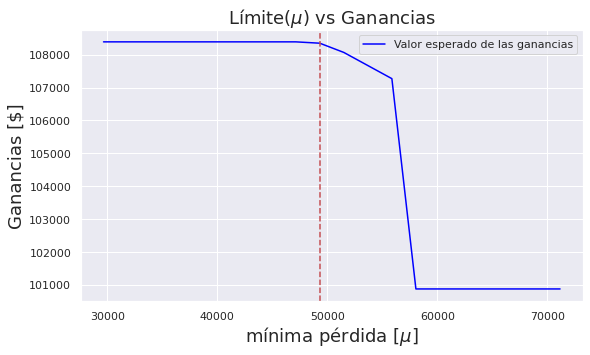

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

plt.figure(figsize=(9, 5))
plt.plot(list(profitsP2.keys()), list(ExpP2.values()), label="Valor esperado de las ganancias", color="blue")
plt.title(r'Límite($\mu$) vs Ganancias', fontsize=18)
plt.axvline(x=49312.63157894737, linestyle="--", color="r")
plt.grid(True)
plt.ylabel("Ganancias [$]", fontsize=18)
plt.xlabel(r"mínima pérdida [$\mu$]", fontsize=18)
plt.legend()

#### *Se aprecia de la gráfica que efectivamente, el valor de $\mu_{min}$ adecuado o como el límite es 49.312$ a partir de ese punto, el modelo comienza a encarecerse, así que el granjero Ted en este caso, decide sabiamente que su máxima ganancia será de 108.390 sabiendo que se le va materializar el peor escenario. como vemos y según lo explicado en clase, el modelo estocástico lo que va hacer es apuntarle a una ganancias que en promedio tienen buen desempeño, no quiere decir que el granjero en su primer cultivo ganara ese valor, es solo un promedio*